<a href="https://colab.research.google.com/github/ankur2392roy/Online-fraud/blob/main/Online_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns


In [123]:
df=pd.read_csv('onlinefraud.csv',index_col=False)
df.head(10)
df.shape[0]


6362620

In [137]:
#Filter out transaction types by fraud or not fraud
df_fraud=df[df['isFraud']==1.0]
df_notfraud=df[df['isFraud']==0.0]
print(df[df['isFraud']==1.0].shape[0])


8213


In [135]:
trans_type=df['type'].unique()
print("Different transaction types:",trans_type)
df.loc[(df['type']=='TRANSFER') & (df['isFraud']==1.0), 'Fraud']=1.0
df.loc[(df['type']=='TRANSFER' )& (df['isFraud']==0.0), 'Fraud']=0.0
df.groupby('Fraud').count()

Different transaction types: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Fraud,,,,,,,,,,,
0.0,528812,528812,528812,528812,528812,528812,528812,528812,528812,528812,528812
1.0,4097,4097,4097,4097,4097,4097,4097,4097,4097,4097,4097


In [136]:
import matplotlib.pyplot as plt
df_transfer=df[df['type']=='TRANSFER']
df_payment=df[df['type']=='PAYMENT']
df_debit=df[df['type']=='DEBIT']
df_cashout=df[df['type']=='CASH_OUT']
df_cashin=df[df['type']=='CASH_IN']


a=df_transfer.groupby('isFraud')['type'].count()
b=df_payment.groupby('isFraud')['type'].count()
c=df_debit.groupby('isFraud')['type'].count()
d=df_cashout.groupby('isFraud')['type'].count()
e=df_cashin.groupby('isFraud')['type'].count()

trans_fraud_type=np.array([a,b,c,d,e])


<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


ValueError: ignored

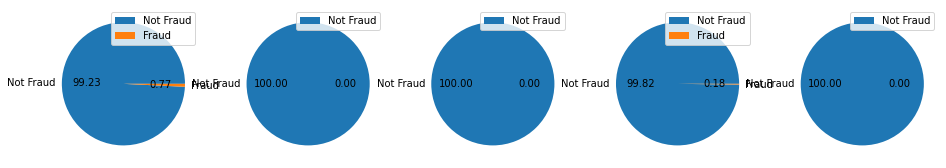

In [150]:

for dframe in trans_fraud_type:
  length=len(dframe)
  if length==1:
    dframe[1]=0
    
df2 = pd.DataFrame({'Transfer': [a[0],a[1]],'Payment':[b[0],b[1]],'Debit':[c[0],c[1]],'Cash_out':[d[0],d[1]],'Cash_in':[e[0],e[1]]},
                  index=['Not Fraud','Fraud'])

df2.plot(kind='pie', subplots=True, figsize=(16,4),autopct='%.2f',ylabel='',title=trans_type)
